In [2]:
#Importando biblioteca Panda
import pandas as pd

In [4]:
#Leitura de Arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
#Leitura dos dados
df5.head()


,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [5]:
#Juntando os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [6]:
#Exibindo as primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
#Exibindo os ultimos registros
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [8]:
#Exibindo uma amostra
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
35,Fortaleza,2019-01-01,133.97,1005,2
92,Aracaju,2018-01-01,37.46,1520,7
83,Salvador,2019-01-01,63.66,1036,2
215,Natal,2019-01-02,203.84,1036,1
119,Fortaleza,2019-03-02,152.30,982,7


In [9]:
#Verificando o tipo de dados de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [10]:
#Alterando o tipo de dado de int para Objec
df["LojaID"] = df["LojaID"].astype("object")

In [43]:
#verifica a quantidade de valores nulos
df.isnull().sum()

Cidade             0
Data               0
Vendas             0
LojaID             0
Qtde               0
Receitas           0
Receitas/Vendas    0
dtype: int64

In [44]:
#Substituir nulos pela media de vendas
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [45]:
#Substituir nulos por 0
df["Vendas"].fillna(0, inplace=True)

In [46]:
df["Vendas"].mean()

122.61180089485458

In [47]:
#Apagar valores nulos
df["Vendas"].dropna(inplace=True)

In [48]:
#Criando a coluna Receita
df["Receitas"] = df["Vendas"].mul(df["Qtde"])

In [49]:
#Criando a coluna Receita por vendas
df["Receitas/Vendas"] = df["Receitas"] / df["Vendas"]

In [50]:
#Exibindo a Maior Receita
df["Receitas"].max()

3544.0

In [51]:
#Exibindo as Maiores Receitas
df.nlargest(3, "Receitas")

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [52]:
#Exibindo as Menores  Receitas
df.nsmallest(3, "Receitas")

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [53]:
#Agrupando por cidade
df.groupby("Cidade")["Receitas"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receitas, dtype: float64

In [54]:
#Ordenando por valores
df.sort_values("Receitas", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


### **Trabalhando com Datas**

In [55]:
#Transformando coluna data para inteiro
df["Data"] = pd.to_datetime(df["Data"])

In [56]:
df.dtypes

Cidade                     object
Data               datetime64[ns]
Vendas                    float64
LojaID                     object
Qtde                        int64
Receitas                  float64
Receitas/Vendas           float64
dtype: object

In [57]:
#Agrupando Receita por Ano
df.groupby(df["Data"].dt.year)["Receitas"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receitas, dtype: float64

In [58]:
#Criando uma nova colula
df["AnoVenda"] = df["Data"].dt.year
df["MesVenda"] = df["Data"].dt.month
df["DiaVenda"] = df["Data"].dt.day

In [59]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas,AnoVenda,MesVenda,DiaVenda
58,Fortaleza,2019-01-01,38.90,1004,4,155.60,4.0,2019,1,1
95,Fortaleza,2019-01-01,35.28,1002,2,70.56,2.0,2019,1,1
47,Salvador,2019-01-01,190.03,1036,2,380.06,2.0,2019,1,1
2,Natal,2019-03-11,308.00,852,3,924.00,3.0,2019,3,11
55,Aracaju,2018-01-01,67.23,1520,8,537.84,8.0,2018,1,1


In [60]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [61]:
#Calcula diferença de dias
df["DiferencaDias"] = df["Data"] - df["Data"].min()

In [62]:
#Criando uma coluna de Trimestre
df["TrimestreVenda"] = df["Data"].dt.quarter

In [63]:
#Filtrar vendas de 2019 e do mes de março - Cria uma variavel e inclui as vendas
vendasMarco2019 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [65]:
vendasMarco2019.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas,AnoVenda,MesVenda,DiaVenda,DiferencaDias,TrimestreVenda
120,Recife,2019-03-02,184.90,982,4,739.60,4.0,2019,3,2,425 days,1
125,Fortaleza,2019-03-02,37.60,983,4,150.40,4.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
128,Recife,2019-03-02,38.70,982,4,154.80,4.0,2019,3,2,425 days,1
108,Salvador,2019-03-02,11.72,1037,1,11.72,1.0,2019,3,2,425 days,1


### **Visualização de Dados**

In [66]:
df["LojaID"].value_counts(ascending=False).head(5)

1036    117
1035    112
1037    101
1034     67
983      65
Name: LojaID, dtype: int64

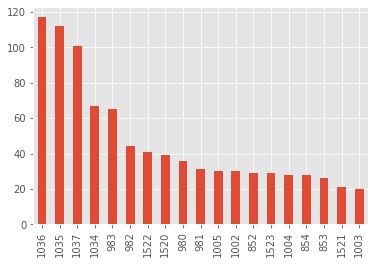

In [69]:
#Criando um grafico 
df["LojaID"].value_counts(ascending=False).plot.bar();

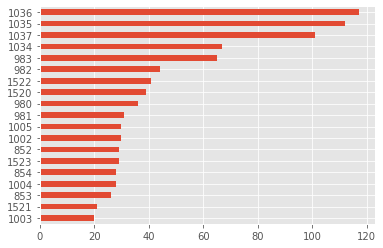

In [68]:
#Criando um grafico com barras horizontais 
df["LojaID"].value_counts(ascending=True).plot.barh();

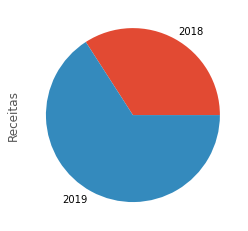

In [70]:
#Grafico de pizza por ano
df.groupby(df["Data"].dt.year)["Receitas"].sum().plot.pie();

In [71]:
#Importando biblioteca plot - Graficos
import matplotlib.pyplot as plt

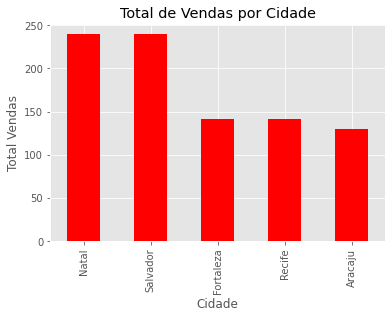

In [72]:
#Adicionando títulos e alterando nome dos elementos e cor
df["Cidade"].value_counts().plot.bar(title="Total de Vendas por Cidade", color ="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [73]:
#Alterando estilo do grafico
plt.style.use("ggplot")

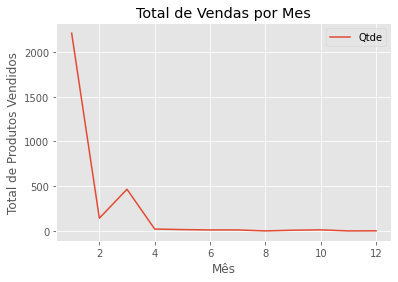

In [77]:
#Novo gráfico com estilo diferente
#Total de Produtos Vendidos por mes
df.groupby(df["MesVenda"])["Qtde"].sum().plot(title="Total de Vendas por Mes");
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos");
plt.legend();

In [78]:
#Quantidade de Vendas por Mes
df.groupby(df["MesVenda"])["Qtde"].sum()

MesVenda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [92]:
#Quantidade de produtos vendidos por mes em 2019 
df2019 = df[df["AnoVenda"] == 2019]
df2019.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Receitas/Vendas,AnoVenda,MesVenda,DiaVenda,DiferencaDias,TrimestreVenda
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,6.0,2019,1,1,365 days,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,1.0,2019,1,1,365 days,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,3.0,2019,1,1,365 days,1
10,Aracaju,2019-01-01,42.34,1522,6,254.04,6.0,2019,1,1,365 days,1
11,Aracaju,2019-01-01,161.53,1520,4,646.12,4.0,2019,1,1,365 days,1


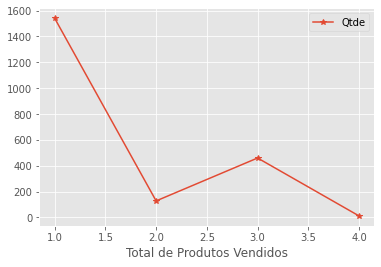

In [94]:
#Grafico com quantidade de produtos vendidos por mes em 2019
df2019.groupby(df2019["MesVenda"])["Qtde"].sum().plot(marker = "*")
plt.xlabel("Mes")
plt.xlabel("Total de Produtos Vendidos")
plt.legend();

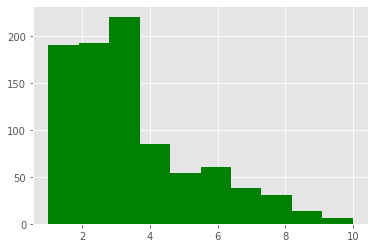

In [96]:
#Grafico de Histograma
plt.hist(df["Qtde"], color = "Green");

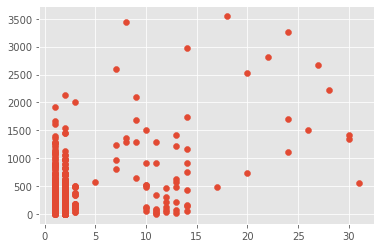

In [98]:
#Grafico de Dispersão
plt.scatter(x=df2019["DiaVenda"], y=df2019["Receitas"]);

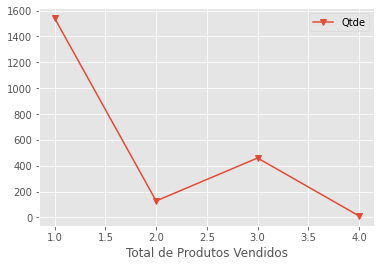

In [99]:
#Salvando graficos em imagem
df2019.groupby(df2019["MesVenda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mes")
plt.xlabel("Total de Produtos Vendidos")
plt.legend()
plt.savefig("Grafico Quantidade Mes.png")